# Recolección de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline1.png?raw=true"
         width="1000" align="middle">  
</div>

In [1]:
import os
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import keras
import tensorflow
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from glob import glob
import gdown

### **Whats-Burning dataset:**

El dataset "whats-burning" pesa alrededor de 500Mbytes y contiene 3801 imágenes a color, por un lado imágenes de incendios y/o fuego y por otro lado imágenes donde no hay fuego o simplemente humo. Cada imagen, al ser de color, cada pixel posee 3 canales de profundidad (R, G, B).

Dataset extraído de la página de "Kaggle: Your Machine Learning and Data Science Community"

<a href="https://www.kaggle.com/escofresco/whats-burning"><h4>Dataset source</h4></a>

In [2]:
# Descargar el dataset.
# Aprovechamos la librería gdown para descargar archivos automáticamente desde Google Drive.
# Hacemos uso de la librería os para tener control de la ruta de descarga.
dataset_name = "whats_burning_dataset"

if os.access(dataset_name, os.F_OK) is False:  # Si no se puede acceder al archivo (dataset)
    if os.access(dataset_name + '.zip', os.F_OK) is False: 
        url = "https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download"
        output = dataset_name + '.zip'
        gdown.download(url, output, quiet=False)
    
    !unzip -q whats_burning_dataset.zip
    
else:
    print('El dataset ya se encuentra descargado.')

Downloading...
From: https://drive.google.com/uc?id=1y6SSwmQOGPVn5b7fNjnKIhxOTpajMSmh&export=download
To: /content/whats_burning_dataset.zip
521MB [00:04, 117MB/s]


In [3]:
# Visualizamos los directorios o carpetas usando la librería "os".
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
dataset_folder

['test', 'train']

In [4]:
# Visualizar el contenido de las carpetas.
train_dir = os.path.join(dataset, 'train')
test_dir= os.path.join(dataset, 'test')

files = os.listdir(train_dir) # Obtengo las salidas.
print('\n', files)
print('\nEl número de Salidas que voy a tener es:', len(files))


 ['fire', 'not_fire']

El número de Salidas que voy a tener es: 2


In [5]:
# Creo el path de la carpeta de "validation"
validation_dir = os.path.join(dataset, 'validation')

# Creo el directorio de "validation" y sus respectivas carpetas.
try:
  os.mkdir(validation_dir)
  os.mkdir(os.path.join(validation_dir, 'not_fire'))
  os.mkdir(os.path.join(validation_dir, 'fire'))
  
  print("Create the directory {}".format(validation_dir))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))
  print("Create the directory {}".format(os.path.join(validation_dir, 'not_fire')))

except OSError as error:
  print(error)

Create the directory ./burning/validation
Create the directory ./burning/validation/not_fire
Create the directory ./burning/validation/not_fire


In [7]:
# Compruebo nuevamente las carpetas del dataset
dataset = "./burning" # Nombre de la carpeta general.
dataset_folder = os.listdir(dataset)
print('Contenido del directorio {} es:\n\n{}'.format(dataset, dataset_folder))

Contenido del directorio ./burning es:

['validation', 'test', 'train']


In [8]:
# Visualizo ahora que la carpeta de "validation" tenga las 
# subcarpetas correspondientes
os.listdir(validation_dir)

['fire', 'not_fire']

#### **Conclusiones**
Ahora tenemos creada la carpeta de "validation" y a su vez la misma está dividida en las categorías correspondientes.

A continuación vamos a exportar algunas imágenes de "train" y "validation" por cada categoría.

In [9]:
# Obtenemos las imágenes de cada categoría de la carpeta "train" usando 
# biblioteca glob.
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
train_notfire_img = []
train_fire_img = []

for format in formats:
  train_notfire_img += glob(train_dir + "/" + 'not_fire' + format)
  train_fire_img += glob(train_dir + "/" + 'fire' + format)


In [10]:
# Obtengo la cantidad de imágenes de cada categoría:
len(train_notfire_img), len(train_fire_img)

(2113, 928)

In [11]:
# Realizamos lo mismo con la carpeta de "test".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
test_notfire_imgs = []
test_fire_imgs = []

for format in formats:
  test_notfire_imgs += glob(test_dir + "/" + 'not_fire' + format)
  test_fire_imgs += glob(test_dir + "/" + 'fire' + format)

In [12]:
# Obtengo la cantidad de imágenes de cada categoría:
len(test_notfire_imgs), len(test_fire_imgs)

(528, 232)

#### **Importante**: Como tengo pocos datos de "train", voy a dejar aprox. 20 imágenes de cada categoría en la carpeta de "test", las demás serán movidas a "train".

In [13]:
import random
from shutil import move

# Función que mueve una cantidad de imágenes a
# una dirección destino, se debe pasar como 1er
# parámetro un contenedor (lista/tupla) con las imágenes,
# el destino y el porcentaje de las imágenes.

def move_imgs (src_imgs, dst_path, percent_imgs):
  # Obtengo la cantidad de imágenes de forma random.
  cant_imgs = int(np.ceil((len(src_imgs) * percent_imgs) / 100 ))
  imgs = random.sample(src_imgs, cant_imgs)
  
  for img in imgs:
    move(src=img, dst=dst_path)

  print('{} images trasferred to: "{}"'.format(cant_imgs, dst_path))

In [14]:
# Muevo las imágenes de "test" a "train"
move_imgs(src_imgs=test_notfire_imgs, dst_path=os.path.join(train_dir, 'not_fire'), percent_imgs=96.2)
move_imgs(src_imgs=test_fire_imgs, dst_path=os.path.join(train_dir, 'fire'), percent_imgs=91.3)

508 images trasferred to: "./burning/train/not_fire"
212 images trasferred to: "./burning/train/fire"


In [15]:
# Muevo las imágenes a la carpeta de "validation" - "not_fire"

dst=os.path.join(validation_dir, "not_fire")
percentage = 20

move_imgs (src_imgs=train_notfire_img, dst_path=dst, percent_imgs= percentage)

423 images trasferred to: "./burning/validation/not_fire"


In [16]:
# Muevo las imágenes a la carpeta de "validation" - "fire"

dst=os.path.join(validation_dir, "fire")
percentage = 20

move_imgs (src_imgs=train_fire_img, dst_path=dst, percent_imgs= percentage)

186 images trasferred to: "./burning/validation/fire"


In [17]:
# Se vuelve a ver la cant. de imágenes de cada categoría del
# directorio "train".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
train_notfire_img = []
train_fire_img = []

for format in formats:
  train_notfire_img += glob(train_dir + "/" + 'not_fire' + format)
  train_fire_img += glob(train_dir + "/" + 'fire' + format)

len(train_notfire_img), len(train_fire_img)

(2198, 954)

In [18]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "test".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
test_notfire_imgs = []
test_fire_imgs = []

for format in formats:
  test_notfire_imgs += glob(test_dir + "/" + 'not_fire' + format)
  test_fire_imgs += glob(test_dir + "/" + 'fire' + format)

len(test_notfire_imgs), len(test_fire_imgs)

(20, 20)

In [21]:
# Visulizamos la cant. de imágenes de cada categoría del
# directorio "validation".
formats = ['/**.jpg', '/**.JPG', '/**.png', '/**.PNG', '/**.jpeg', '/**.JPEG']
validation_notfire_imgs = []
validation_fire_imgs = []

for format in formats:
  validation_notfire_imgs += glob(validation_dir + "/" + 'fire' + format)
  validation_fire_imgs += glob(validation_dir + "/" + 'not_fire' + format)

len(validation_notfire_imgs), len(validation_fire_imgs)

(186, 423)

#### **Conclusiones**
Ya hemos tomado y separado algunos de los datos/imágenes de "train" y los hemos agregado en "validation", lo que significa que tenemos datos para validar.

Ahora se procede a visualizar alguna de las imágenes y se procede a ver las características de cada imagen.

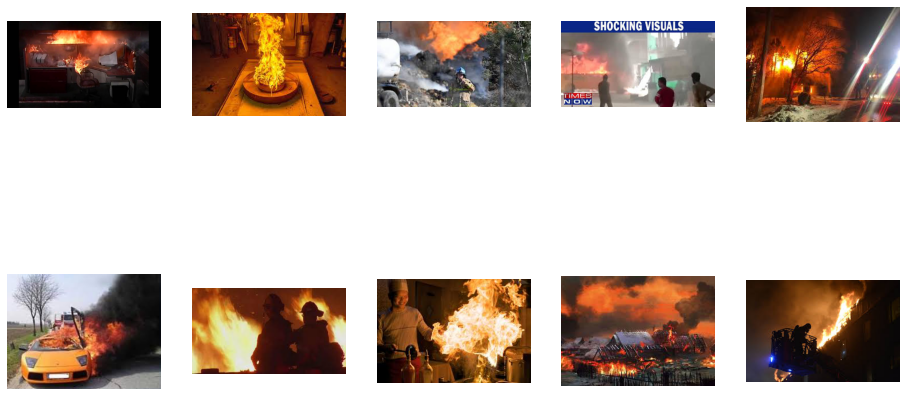

In [22]:
# Visualizar las primeras 10 imágenes de la categoría "fire" de la
# carpeta de "train".
fig1 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig1.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_fire_img[i])
  plt.imshow(img, vmin=0, vmax=255)

plt.show()

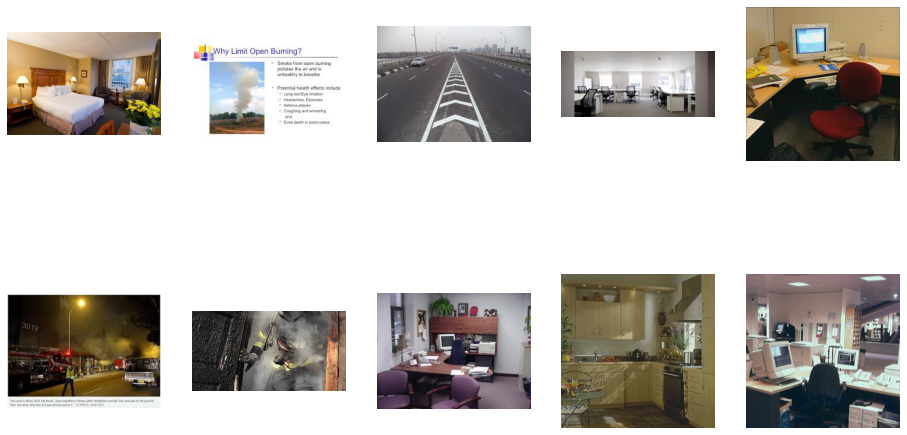

In [23]:
# Visualizar las primeras 10 imágenes de la categoría "not_fire" de la
# carpeta de "train".
fig2 = plt.figure(figsize=(16, 9))

for i in range(10):
  ax =fig2.add_subplot(2, 5, i+1)
  ax.axis('off')
  img = mpimg.imread(train_notfire_img[i])
  plt.imshow(img, vmin=0, vmax=255)

plt.show()

In [24]:
# Visualizamos la dimensión de las 10 primeras imágenes de "fire".
print('Shape:\n')
for i in range(10):
  img = mpimg.imread(train_fire_img[i])
  print(img.shape)

Shape:

(720, 1280, 3)
(183, 275, 3)
(168, 300, 3)
(168, 300, 3)
(194, 260, 3)
(194, 259, 3)
(168, 299, 3)
(185, 272, 3)
(189, 266, 3)
(183, 275, 3)


In [25]:
# Visualizamos como están representados los píxeles de
# la 1er imagen de la categoría "fire"
img = mpimg.imread(train_fire_img[0])
print(img[101, 114:122, :])

[[16  4  4]
 [16  4  4]
 [16  4  4]
 [16  4  4]
 [16  4  4]
 [16  4  4]
 [16  4  4]
 [16  4  4]]


#### **Conclusiones**
* Las imágenes tienen distinta resolución(tamaño), por  lo tanto hay que utilizar un tamaño único para que todas las imágenes sean iguales (se elije una resolución de 150x150).
* En las imágenes, cada píxel, como se puede observar, están representados de 0 a 255, por lo hay que normalizar los mismos.

In [26]:
# Obtenemos las categorías:
categorias = os.listdir(train_dir)
categorias

['fire', 'not_fire']

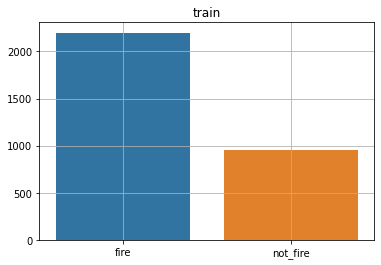

In [27]:
# Realizamos un gráfico de barra para visualizar
# que tan balanceado o desbalanceados están
# las categorías "fire" y "not_fire" de los
# datos de "train".
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('train')
sns.barplot(x=categorias, y=[len(train_notfire_img), len(train_fire_img)], ax=ax)
ax.grid()
plt.show()

#### **Conclusiones**
Observamos que el dataset de "train" está bastante desbalanceado. Hay más imágenes de "not_fire" que de "fire".

Nuestra salida (target) es multicategórica ("not_fire", "fire")

# Procesamiento de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline2.png?raw=true"
         width=1000 aling="middle">
</div>

In [28]:
# Creamos un generador, donde indicamos si deseamos realizar un escalado
# y/o normalización de las imágenes.
from keras.preprocessing.image import ImageDataGenerator

norma = 255   # Definimos la norma.
standard_resolution = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./norma)
validation_datagen = ImageDataGenerator(rescale=1./norma)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

Found 3152 images belonging to 2 classes.
Found 609 images belonging to 2 classes.


In [29]:
# Obtengo un diccionario con la cant de clases
train_generator.class_indices

{'fire': 0, 'not_fire': 1}

In [30]:
# Ahora realizamos este paso para obtener los
# índices de las etiquetas y la visualizamos
# como un diccionario.
index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))
index_to_classes

{0: 'fire', 1: 'not_fire'}

#### **Conclusiones**
Hemos creados los generadores, realizamos una normalización de los canales de cada píxel de las imágenes y finalmente modificamos el tamaño de las mismas eligiendo una resolución estándar. Todo esto usando el DataImageGenerator proporcionado por Keras.

Para asegurarnos vamos a obtener un ImageDataGenerator de "train" por cada modelo que entrenemos.

# Exploración de los Datos.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline3.png?raw=true"
         width=1000 aling="middle">
</div>

In [31]:
# El generador "train_generator" se lo puede utilizar para acceder a los datos
# de a cantidad batch de imágenes. En este caso el generador me retornará
# la primera vez las primeras 20 imágenes.
# El generador va a devolver por un lado las 20 1ras imágenes y por otro lado
# la clase a la que pertenece cada una a través del método "next".
batch_imgs, batch_classes = train_generator.next()

In [32]:
# Efectivamente visualizamos que el generador entregó 20 imágenes 
# de 150x150 a color (3 canales).
batch_imgs.shape

(20, 150, 150, 3)

In [33]:
# Visualizamos la clase a la que pertenece cada una de las
# 20 imágenes devueltas por el generador.
batch_classes.shape

(20, 2)

In [34]:
print("Cantidad de imágenes en el batch:", batch_imgs.shape[0])
print("Dimensión de la imagen:", batch_imgs.shape[1:])

Cantidad de imágenes en el batch: 20
Dimensión de la imagen: (150, 150, 3)


In [35]:
print('Categorías:', categorias)
print("Cantidad de clases/categorías:", batch_classes.shape[1])

Categorías: ['fire', 'not_fire']
Cantidad de clases/categorías: 2


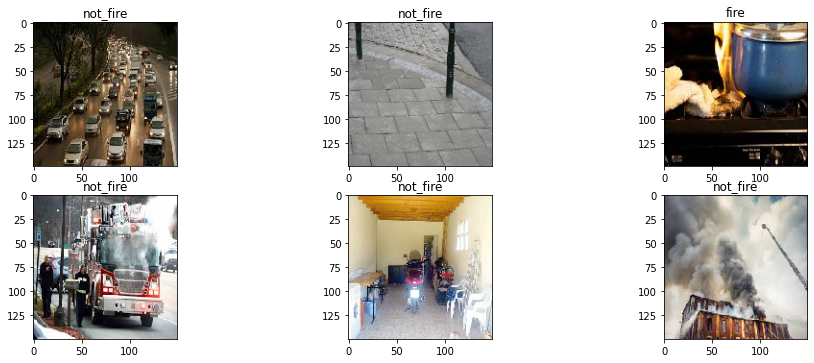

In [36]:
# Visualizamos las primeras 6 imágenes del batch devuelto por el generador.
fig = plt.figure(figsize=(16, 9))
for i in range(6):
  ax = fig.add_subplot(3, 3, i+1)
  ax.axis('on')
  classes_name = batch_classes[i].argmax()  # Obtengo el índice de las etiquetas.
  ax.set_title(index_to_classes.get(classes_name)) # Obtengo las etiquetas.
  ax.imshow((batch_imgs[i]))

plt.show()

#### **Conclusiones**
* Observamos que ahora las imágenes efectivamente son de 150x150.
* El generador ya que encarga de transformar la salida (target), de labels a oneHotEncoding.

#### **Importante**
Una vez que es consumido el generador, los datos (imágenes) desaparecen de memoria, por lo que hay que volver a crear el generador.

In [37]:
# Volvemos a crear el generador de "train"
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

index_to_classes = dict(zip(train_generator.class_indices.values(), train_generator.class_indices.keys()))


Found 3152 images belonging to 2 classes.


# Entrenamiento del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline4.png?raw=true"
         width=1000 aling="middle">
</div>

In [38]:
# input shape (observado del análisis de datos)
in_shape = batch_imgs.shape[1:]
in_shape

(150, 150, 3)

In [39]:
# output shape (observado del análisis de datos)
out_shape = batch_classes.shape[1]
out_shape

2

#### **Importante**
Cuando nosotros usamos ImageDataGenerator el sistema no sabe de antemano el tamaño del batch, es decir, no sabe cuantas imágenes va a leer por épocas (por ciclos de entrenamiento), por lo tanto se lo tenemos que decir.

In [40]:
# Debemos definir cuántas imágenes se consumirán por
# época (step_per_epoch) ya que estando el generador
# en el medio Keras no puede saberlo por su cuenta.

# El resultado equivale a dividir la cant. total de 
# imágenes que hay en el directorio de "train" dividido
# el tamaño del batch. (en este caso: 2436 / 20)

step_per_epoch_train = len(train_generator)
step_per_epoch_train

158

In [41]:
# Realizamos un 1er modelo con una 1 pareja de CONV+POOL
# y una Sola capa oculta.
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model1 = Sequential()

model1.add(Conv2D(filters=8, kernel_size=(5,5), strides=1,
                  padding='same', activation='relu',
                  input_shape=in_shape))
model1.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model1.add(Flatten())
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=out_shape, activation='softmax'))

model1.compile(optimizer='Adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 45000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2880064   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 2,880,802
Trainable params: 2,880,802
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Entrenamos el modelo 1: 
history1= model1.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 60s 109ms/step - loss: 0.5878 - accuracy: 0.8074 - val_loss: 0.3166 - val_accuracy: 0.8719
Epoch 2/10
158/158 [==============================] - 17s 106ms/step - loss: 0.2784 - accuracy: 0.8909 - val_loss: 0.3008 - val_accuracy: 0.8851
Epoch 3/10
158/158 [==============================] - 17s 106ms/step - loss: 0.1750 - accuracy: 0.9355 - val_loss: 0.3281 - val_accuracy: 0.8883
Epoch 4/10
158/158 [==============================] - 17s 106ms/step - loss: 0.0891 - accuracy: 0.9691 - val_loss: 0.3248 - val_accuracy: 0.8883
Epoch 5/10
158/158 [==============================] - 17s 106ms/step - loss: 0.0563 - accuracy: 0.9796 - val_loss: 0.4578 - val_accuracy: 0.8834
Epoch 6/10
158/158 [==============================] - 17s 106ms/step - loss: 0.0214 - accuracy: 0.9968 - val_loss: 0.5785 - val_accuracy: 0.8949
Epoch 7/10
158/158 [==============================] - 17s 106ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.6163 - val_ac

In [43]:
# Ahora realizamos un 2do modelo usando "Regularización"
# con Dropout.
# Misma cantidad de capas de CONV+POOL y misma cantidad de
# neuronas en una única capa oculta.

# Volvemos a crear el train_generator.
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model2 = Sequential()

model2.add(Conv2D(filters=8, kernel_size=(5,5), strides=1,
                  padding='same', activation='relu',
                  input_shape=in_shape))
model2.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=out_shape, activation='softmax'))

model2.compile(optimizer='Adam', loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.summary()

Found 3152 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 8)       608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2880064   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 2,880,802
Trainable params: 2,880,802
Non-trainable params: 0
__

In [44]:
# Entrenamos el modelo 2:
history2= model2.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 18s 108ms/step - loss: 0.6793 - accuracy: 0.7635 - val_loss: 0.3072 - val_accuracy: 0.8752
Epoch 2/10
158/158 [==============================] - 17s 105ms/step - loss: 0.2949 - accuracy: 0.8745 - val_loss: 0.2934 - val_accuracy: 0.8801
Epoch 3/10
158/158 [==============================] - 17s 107ms/step - loss: 0.2359 - accuracy: 0.9064 - val_loss: 0.3093 - val_accuracy: 0.8834
Epoch 4/10
158/158 [==============================] - 17s 106ms/step - loss: 0.1789 - accuracy: 0.9330 - val_loss: 0.3646 - val_accuracy: 0.8867
Epoch 5/10
158/158 [==============================] - 17s 105ms/step - loss: 0.1251 - accuracy: 0.9500 - val_loss: 0.3288 - val_accuracy: 0.8949
Epoch 6/10
158/158 [==============================] - 17s 106ms/step - loss: 0.1104 - accuracy: 0.9519 - val_loss: 0.3305 - val_accuracy: 0.8883
Epoch 7/10
158/158 [==============================] - 17s 105ms/step - loss: 0.0820 - accuracy: 0.9700 - val_loss: 0.3909 - val_ac

In [45]:
# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red.

# Volvemos a crear el train_generator.
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = standard_resolution,
    batch_size = 20,
    class_mode = 'categorical')

model3 = Sequential()

# convolucional f=(3,3), # de filtros: 8, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 8, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
# convolucional f=(3,3), # de filtros: 16, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 16, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2))
# convolucional f=(3,3), # de filtros: 32, activación relu
# max pooling f=2, s=2
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2, strides=2))
# capa flatten
model3.add(Flatten())
# capa densa de 128 elementos activación relu
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(rate=0.2))
# capa densa con un output de 10 elemento con activación softmax
model3.add(Dense(units=out_shape, activation='softmax'))

model3.compile(optimizer="Adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Found 3152 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_2 (F

In [46]:
# Entrenamos el Modelo 3:
history3= model3.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=10)

Epoch 1/10
158/158 [==============================] - 18s 110ms/step - loss: 0.5287 - accuracy: 0.7815 - val_loss: 0.2759 - val_accuracy: 0.8982
Epoch 2/10
158/158 [==============================] - 17s 105ms/step - loss: 0.2711 - accuracy: 0.8918 - val_loss: 0.2876 - val_accuracy: 0.8867
Epoch 3/10
158/158 [==============================] - 17s 106ms/step - loss: 0.2456 - accuracy: 0.9080 - val_loss: 0.2683 - val_accuracy: 0.9031
Epoch 4/10
158/158 [==============================] - 17s 105ms/step - loss: 0.1923 - accuracy: 0.9268 - val_loss: 0.2031 - val_accuracy: 0.9278
Epoch 5/10
158/158 [==============================] - 17s 105ms/step - loss: 0.1729 - accuracy: 0.9277 - val_loss: 0.2050 - val_accuracy: 0.9228
Epoch 6/10
158/158 [==============================] - 17s 107ms/step - loss: 0.1391 - accuracy: 0.9457 - val_loss: 0.2144 - val_accuracy: 0.9212
Epoch 7/10
158/158 [==============================] - 17s 107ms/step - loss: 0.1015 - accuracy: 0.9602 - val_loss: 0.2345 - val_ac

In [76]:
# Creo un 4to modelo utilizando esta vez "Transfer Learning".
from tensorflow.keras.applications import VGG16

# Traemos el modelo VGG16 pre entrenado con los pesos
# obtenidos del dataset de ImageNet
# Indicamos que no deseamos las ultimas capas
# de claseificación de la red (include_top=False)
# Indicamos que no deseamos que los pesos de la red
# sean entrenados (vgg_base.trainable=False)

in_shape_tl = (None, 150, 150, 3)

train_generator = train_datagen.flow_from_directory(
        directory=train_dir,
        target_size=standard_resolution,
        batch_size=20,
        class_mode="categorical")

vgg_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=in_shape)
vgg_base.trainable=False 
vgg_base.summary()

Found 3152 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPoo

In [78]:
model4 = Sequential()

# Ahora agregaremos más pares de capas CONV + POOL a fin de reducir más la
# dimensión de la imagen antes de llegar a la capa flatten
# Otra estrategia es ir aumentando la cantidad de filtros a medida que crece
# la profundidad de la red

model4.add(vgg_base)

model4.add(Flatten())
model4.add(Dense(units=128, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(Dense(units=64, activation='relu'))
model4.add(Dropout(rate=0.2))
model4.add(Dense(units=out_shape, activation='softmax'))

model4.compile(optimizer="Adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

in_shape_tl = (None, 150, 150, 3)
model4.build(input_shape=in_shape_tl)
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_3 (ModuleWrap (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

In [80]:
# Entrenamos el Modelo 4:
history4= model4.fit(train_generator, validation_data=validation_generator,
                      steps_per_epoch=step_per_epoch_train, epochs=12)

Epoch 1/12
158/158 [==============================] - 19s 119ms/step - loss: 0.2619 - accuracy: 0.8912 - val_loss: 0.2747 - val_accuracy: 0.8933
Epoch 2/12
158/158 [==============================] - 19s 119ms/step - loss: 0.2154 - accuracy: 0.9143 - val_loss: 0.2996 - val_accuracy: 0.8867
Epoch 3/12
158/158 [==============================] - 19s 119ms/step - loss: 0.1761 - accuracy: 0.9331 - val_loss: 0.2996 - val_accuracy: 0.8900
Epoch 4/12
158/158 [==============================] - 19s 118ms/step - loss: 0.1369 - accuracy: 0.9442 - val_loss: 0.3784 - val_accuracy: 0.8719
Epoch 5/12
158/158 [==============================] - 19s 120ms/step - loss: 0.1297 - accuracy: 0.9486 - val_loss: 0.3318 - val_accuracy: 0.8851
Epoch 6/12
158/158 [==============================] - 19s 121ms/step - loss: 0.1036 - accuracy: 0.9588 - val_loss: 0.3954 - val_accuracy: 0.8818
Epoch 7/12
158/158 [==============================] - 19s 121ms/step - loss: 0.1123 - accuracy: 0.9559 - val_loss: 0.3537 - val_ac

In [106]:
# Creamos una función para graficar el accuracy 
# de train y de validation en función de las épocas.
def plot_model(history, cant_ax, nro_model):
  ax = fig.add_subplot(4, 1, nro_model)
  epoch_count = range(1, len(history.history['accuracy']) + 1)
  sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
  sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='validation')
  plt.title('model ' + str(nro_model))

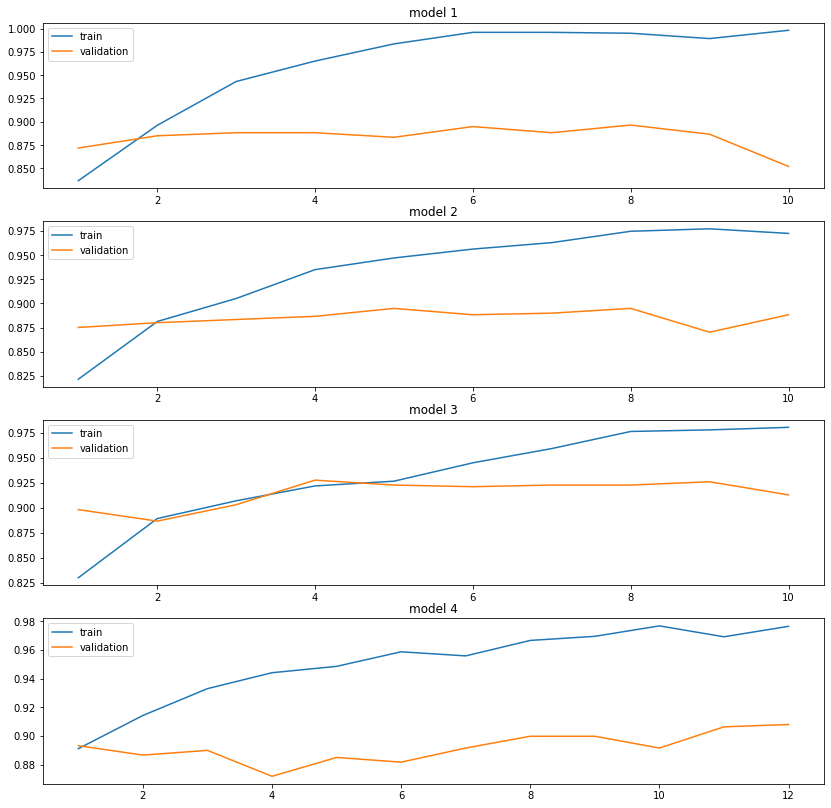

In [107]:
historys = [history1, history2, history3, history4]

fig = plt.figure(figsize=(14, 14)) # Creo la figura
for (history, i) in zip(historys, range(1,len(historys) + 1)):
  plot_model(history, len(historys), i)
plt.show() # Muestro los gráficos.

In [108]:
# Predecir los Datos:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=standard_resolution,
    batch_size=40,
    class_mode='categorical' 
)

Found 40 images belonging to 2 classes.


In [109]:
# Realizo el predict de los modelos y obtengo 
# las probabilidades.
models = [model1, model2, model3, model4]
y_hat_prob = []

for model in models:
  y_hat_prob.append(model.predict(test_generator))

In [110]:
# Obtengo los y_hat correspondientes a cada modelo.
y_hat = []

for y in y_hat_prob:
  y_hat.append(np.argmax(y, axis=1))

for i in range(len(y_hat)):
  print('y_hat del Modelo {}: {}\n'.format(i+1, y_hat[i]))

y_hat del Modelo 1: [0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1]

y_hat del Modelo 2: [0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 1]

y_hat del Modelo 3: [1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 1]

y_hat del Modelo 4: [1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 0 0]



In [111]:
# Tamaño del y_hat de cada modelo.
# Observamos que todos tienen el mismo tamaño.
for i in range(len(y_hat)):
  print('Tamaño del Modelo {}: {}\n'.format(i+1, y_hat[i].shape))

Tamaño del Modelo 1: (40,)

Tamaño del Modelo 2: (40,)

Tamaño del Modelo 3: (40,)

Tamaño del Modelo 4: (40,)



In [112]:
# Ahora obtengo la probabilidad del y_test
batch_test, y_test_prob = test_generator.next()
y_test_prob.shape

(40, 2)

In [113]:
y_test_prob[:11]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [114]:
# Obtengo el y_test.
y_test = np.argmax(y_test_prob, axis=1)
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Validación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline5.png?raw=true"
         width=1000 aling="middle">
</div>

In [115]:
# Calcular la exactitud (accuracy) de los modelos
from sklearn.metrics import accuracy_score
accuracys = []

for y_h in y_hat:
  accuracys.append(accuracy_score(y_test, y_h))

In [116]:
# Visualizo las exactitudes (accuracy) de cada modelo:
for i in range(len(accuracys)):
  print('Accuracy Score del Modelo {}: {}'.format(i+1, accuracys[i]))

Accuracy Score del Modelo 1: 0.35
Accuracy Score del Modelo 2: 0.6
Accuracy Score del Modelo 3: 0.575
Accuracy Score del Modelo 4: 0.5


In [117]:
# Obtengo el mejor modelo.
index = np.where(accuracys==np.max(accuracys))
best_model_index = index[0][0]
best_model = models[best_model_index]
best_y_hat = y_hat[best_model_index]

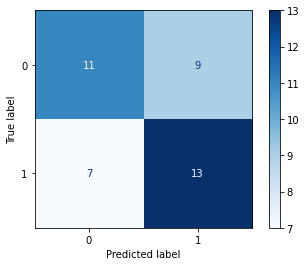

In [118]:
# Visualizo la Matriz de Confusión:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, best_y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=range(47))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [119]:
# Con el mejor modelo obtenido (mejor accuracy)
# pasamos a almacenarlo para luego
# descargarlo y usarlo sin necesidad de volver a entrenarlo.
best_model.save('cnn_whatsburning.h5')

# Aplicación del Modelo.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline6.png?raw=true"
         width=1000 aling="middle">
</div>

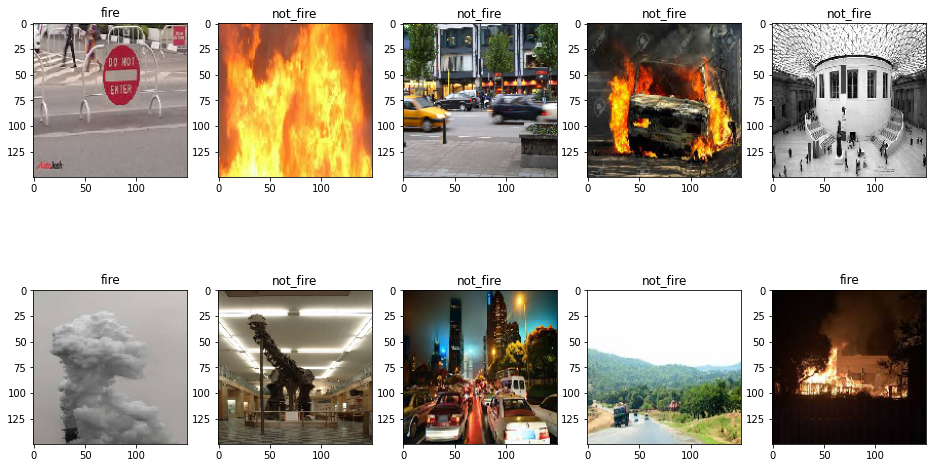

In [120]:
# Observamos las 10 primeras imágenes del batch.
fig = plt.figure(figsize=(16, 9))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(batch_test[i])
  tipo_clase = best_y_hat[i]
  ax.set_title(index_to_classes[tipo_clase])
plt.show()

# Conclusiones.
<div align="center">
    <img src="https://github.com/eotorresmolina/analytics_python/blob/main/images/Pipeline7.png?raw=true"
         width=1000 aling="middle">
</div>

#### *Observamos que hasta el momento con el mejor modelo obtuvimos una exactitud* (**accuracy**) *alrededor de* **0.6**.